# **Arbitrary Value Imputation**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('./dataset/train.csv')
X = df.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
y = df['Survived']

In [5]:
X.head()

,Age,SibSp,Fare
0,22.0,1,7.2500
1,38.0,1,71.2833
2,26.0,0,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [8]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2368.2468324201327
Fare Variance after 999 wala imputation:  2368.2468324201327
Fare Variance after -1 wala imputation:  2368.2468324201327


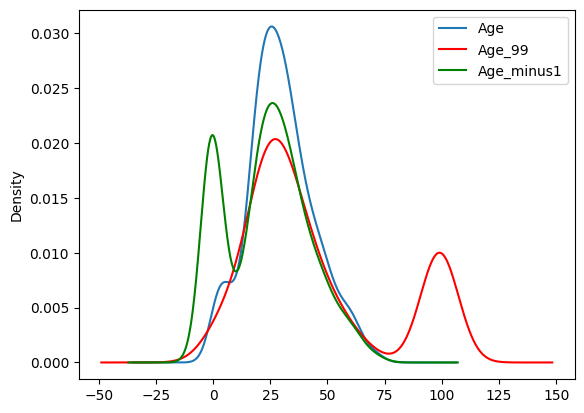

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

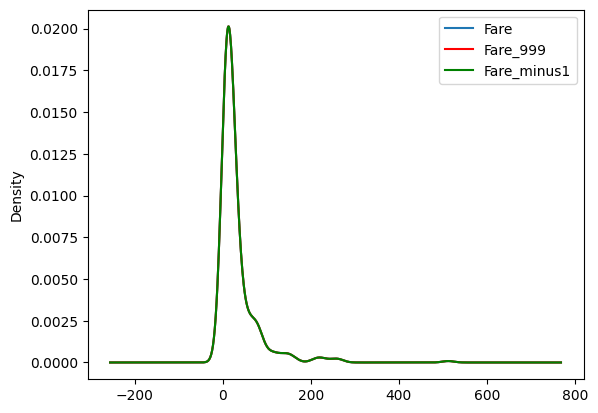

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [11]:
X_train.cov()

,Age,SibSp,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,-4.165283,71.512440,204.349513,204.349513,71.512440,71.512440
SibSp,-4.165283,1.267996,8.567003,-2.396963,-3.699133,8.567003,8.567003
Fare,71.512440,8.567003,2368.246832,-101.053412,126.761454,2368.246832,2368.246832
Age_99,204.349513,-2.396963,-101.053412,951.727557,-189.535540,-101.053412,-101.053412
Age_minus1,204.349513,-3.699133,126.761454,-189.535540,318.089620,126.761454,126.761454
Fare_999,71.512440,8.567003,2368.246832,-101.053412,126.761454,2368.246832,2368.246832
Fare_minus1,71.512440,8.567003,2368.246832,-101.053412,126.761454,2368.246832,2368.246832


In [12]:
X_train.corr()

,Age,SibSp,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,-0.309514,0.095814,1.000000,1.000000,0.095814,0.095814
SibSp,-0.309514,1.000000,0.156335,-0.069000,-0.184190,0.156335,0.156335
Fare,0.095814,0.156335,1.000000,-0.067310,0.146049,1.000000,1.000000
Age_99,1.000000,-0.069000,-0.067310,1.000000,-0.344476,-0.067310,-0.067310
Age_minus1,1.000000,-0.184190,0.146049,-0.344476,1.000000,0.146049,0.146049
Fare_999,0.095814,0.156335,1.000000,-0.067310,0.146049,1.000000,1.000000
Fare_minus1,0.095814,0.156335,1.000000,-0.067310,0.146049,1.000000,1.000000


## **Using Sklearn**

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [15]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [16]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [17]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [18]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [19]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [20]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   1.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])